# Hello everyone,

Welcome to my notebook
As we know our problem statement is to identify the Person Diabetics 

Now,

Importing the required Libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


# import octopus_ml as oc
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import roc_auc_score,roc_curve
from catboost import CatBoostClassifier,Pool

# For Saving our Prediction files 
We need to create a dataframe 

In [2]:
def download_preds(preds_test, file_name = 'sub.csv'):
    df = pd.DataFrame()
    ## 1. Setting the target column with our obtained predictions
    df['encounter_id'] = test['encounter_id']
    df['diabetes_mellitus'] = preds_test
    ## 2. Saving our predictions to a csv file
    df.to_csv(file_name, index = False)

# Step 1

1.Importing the data into our pandas.

2.Train (saving are training dataset ).

3.Test (saving are testing dataset)

In [3]:
train=pd.read_csv('train_base.csv')
test=pd.read_csv('test_base.csv')
train.head()

,Unnamed: 0,encounter_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,...,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,diabetes_mellitus
0,1,214826,118,68.0,22.732803,0,Caucasian,M,180.3,Floor,...,NaN,NaN,0,0,0,0,0,0,0,1
1,2,246060,81,77.0,27.421875,0,Caucasian,F,160.0,Floor,...,51.0,51.0,0,0,0,0,0,0,0,1
2,3,276985,118,25.0,31.952749,0,Caucasian,F,172.7,Emergency Department,...,NaN,NaN,0,0,0,0,0,0,0,0
3,4,262220,118,81.0,22.635548,1,Caucasian,F,165.1,Operating Room,...,337.0,337.0,0,0,0,0,0,0,0,0
4,5,201746,33,19.0,NaN,0,Caucasian,M,188.0,NaN,...,NaN,NaN,0,0,0,0,0,0,0,0


# Step 2 

# Exploring the Data
Train and Test

In [4]:
train.head()

,Unnamed: 0,encounter_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,...,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,diabetes_mellitus
0,1,214826,118,68.0,22.732803,0,Caucasian,M,180.3,Floor,...,NaN,NaN,0,0,0,0,0,0,0,1
1,2,246060,81,77.0,27.421875,0,Caucasian,F,160.0,Floor,...,51.0,51.0,0,0,0,0,0,0,0,1
2,3,276985,118,25.0,31.952749,0,Caucasian,F,172.7,Emergency Department,...,NaN,NaN,0,0,0,0,0,0,0,0
3,4,262220,118,81.0,22.635548,1,Caucasian,F,165.1,Operating Room,...,337.0,337.0,0,0,0,0,0,0,0,0
4,5,201746,33,19.0,NaN,0,Caucasian,M,188.0,NaN,...,NaN,NaN,0,0,0,0,0,0,0,0


In [5]:
test.head()

,Unnamed: 0,encounter_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,...,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis
0,1,144740,10141,72,NaN,0,Caucasian,F,152.4,Floor,...,NaN,NaN,NaN,0,0,0,0,0,0,0
1,2,141990,10141,86,NaN,0,Caucasian,F,175.3,Emergency Department,...,NaN,NaN,NaN,0,0,0,0,0,0,0
2,3,142038,10141,72,NaN,0,Caucasian,F,162.6,Floor,...,NaN,NaN,NaN,0,0,0,0,0,0,0
3,4,138628,10141,66,NaN,0,Caucasian,M,177.8,Floor,...,NaN,NaN,NaN,0,0,0,0,0,0,0
4,5,141682,10141,89,NaN,0,Caucasian,M,170.2,Direct Admit,...,NaN,NaN,NaN,0,0,0,0,0,0,0


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130157 entries, 0 to 130156
Columns: 181 entries, Unnamed: 0 to diabetes_mellitus
dtypes: float64(157), int64(18), object(6)
memory usage: 179.7+ MB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10234 entries, 0 to 10233
Columns: 180 entries, Unnamed: 0 to solid_tumor_with_metastasis
dtypes: float64(156), int64(18), object(6)
memory usage: 14.1+ MB


In [8]:
train.shape,test.shape

((130157, 181), (10234, 180))

In [9]:
train.isnull().sum().sort_values(ascending=False)

h1_bilirubin_max     119861
h1_bilirubin_min     119861
h1_albumin_max       119005
h1_albumin_min       119005
h1_lactate_min       118467
                      ...  
icu_stay_type             0
icu_id                    0
elective_surgery          0
hospital_id               0
diabetes_mellitus         0
Length: 181, dtype: int64

# After the Exploration of data,
# What we got to know
1.Shape or our data.

2.Null / Missing values in our Dataset.


# Step 3 
# Feature Engineering part

1.Filling the Null values

2.Converting the categrical features into numeric for better performance of our Model.

3.Dropping irrelevant Feature.

4.Recheck the Data

In [10]:
#removing missing values from categorical features

cat_cols=[col for col in train.columns if train[col].dtype=="object"]

max_val=['Caucasian','M','Emergency Department','Accident & Emergency','admit','Med-Surg ICU']
for i,col in enumerate(cat_cols):
    if train[col].isnull().any()==True:
        train[col]=train[col].fillna(max_val[i])

for i,col in enumerate(cat_cols):
    if test[col].isnull().any()==True:
        test[col]=test[col].fillna(max_val[i])

In [11]:
#removing missing values from numerical features

for col in train.columns:
    if train[col].dtype=='int' or train[col].dtype=='float':
        train[col]=train[col].fillna(train[col].median())
for col in test.columns:
    if test[col].dtype=='int' or test[col].dtype=='float':
        test[col]=test[col].fillna(test[col].median())

In [12]:
#Removing the Irrelevant 

train.drop('Unnamed: 0',axis=1,inplace=True)
test.drop('Unnamed: 0',axis=1,inplace=True)

In [13]:
#Recheck null values

train.isnull().sum().sum()

0

In [14]:
#Viewing the Categorical feature

cat_features = train.select_dtypes(include=[np.object])
cat_features.dtypes

c:\python37\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


ethnicity                object
gender                   object
hospital_admit_source    object
icu_admit_source         object
icu_stay_type            object
icu_type                 object
dtype: object

In [15]:
#Converting object type feature into numeric using label encoding

from sklearn.preprocessing import LabelEncoder
for col in cat_features:
    labelencoder = LabelEncoder()
    labelencoder.fit(train[col])
    train[col] = labelencoder.fit_transform(train[col])
    test[col] = labelencoder.transform(test[col])

# Step 4

# Visualizing the Data,

1.From Seaborn Countplot.

2.Heatmap for viewing the strength and directions.

3.By this we able to see Positive/Negative correlation between feature.

Note :- By defalt correlation matrix, used Pearson's correlation method for determine the correlated features.

4.I found good with this correlation that's why i used this

You can go with Spearsman Corr 

5.Feature Selection 

In [16]:
import seaborn as sns

c:\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='diabetes_mellitus', ylabel='count'>

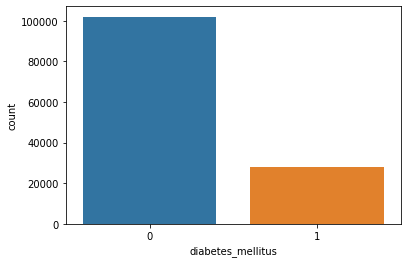

In [17]:
sns.countplot(train['diabetes_mellitus'])

<AxesSubplot:>

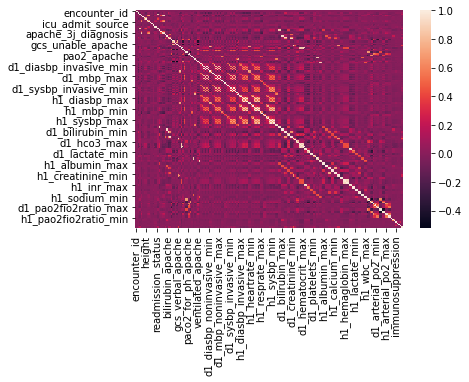

In [18]:
sns.heatmap(train.corr())

In [20]:
corr_matrix = abs(train.corr())
print(corr_matrix["diabetes_mellitus"].sort_values(ascending=False))

diabetes_mellitus        1.000000
d1_glucose_max           0.400065
glucose_apache           0.354489
h1_glucose_max           0.251503
h1_glucose_min           0.242088
                           ...   
h1_sysbp_invasive_min    0.000941
h1_spo2_min              0.000915
intubated_apache         0.000318
lymphoma                 0.000253
readmission_status            NaN
Name: diabetes_mellitus, Length: 180, dtype: float64


# Step 5 
# Splitting the Dependent and Independent Feature into (X,y), For model building

In [23]:
y=train.diabetes_mellitus
X=train.drop(['hospital_id','readmission_status','diabetes_mellitus'],axis=1)

x_test=test.drop(['hospital_id','readmission_status'],axis=1)

# Step 6
# Using Lightgbm Classfier for Model Prediction 

1.It's a boosting technique.

2.I found good Accuracy with this model with Hyper Parameter Tuning

In [ ]:
def lgbm(X_train, y_train, X_test, y_test, num, params=None):
    # Training function for LGBM with basic categorical features treatment and close to default params

    categorical_features = []
    for c in X_train.columns:
        col_type = X_train[c].dtype
        if col_type == "object" or col_type.name == "category":
            # an option in case the data(pandas dataframe) isn't passed with the categorical column type
            # X[c] = X[c].astype('category')
            categorical_features.append(c)

    lgb_train = lgb.Dataset(X_train, y_train, categorical_feature=categorical_features)
    lgb_valid = lgb.Dataset(X_test, y_test, categorical_feature=categorical_features)

    if params == None:
        params = {
            "objective": "binary",
            "boosting": "gbdt",
            "scale_pos_weight": 0.02,
            "learning_rate": 0.005,
            "seed": 100
            # 'categorical_feature': 'auto',
            # 'metric': 'auc',
            # 'scale_pos_weight':0.1,
            # 'learning_rate': 0.02,
            # 'num_boost_round':2000,
            # "min_sum_hessian_in_leaf":1,
            # 'max_depth' : 100,
            # "bagging_freq": 2,
            # "num_leaves":31,
            # "bagging_fraction" : 0.4,
            # "feature_fraction" : 0.05,
        }

    clf = lgb.train(params, lgb_train, num,valid_sets=[lgb_valid])

    return clf

# Step 7
# Plotting the AUC / ROC curve based on Predictions

In [ ]:


##draw roc auc curve
def roc_curve_plot(y_test, predictions):
    # Roc curve visualization, binary classification including AUC calculation

    sns.set_style("whitegrid")
    rf_roc_auc = roc_auc_score(y_test, predictions)
    rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, predictions)

    plt.figure(figsize=(8, 6))
    plt.plot(rf_fpr, rf_tpr, label="LGBM (area = %0.3f)" % rf_roc_auc)
    plt.plot([0, 1], [0, 1], "r--")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])

    plt.xlabel("False Positive Rate", fontsize=14)
    plt.ylabel("True Positive Rate", fontsize=14)
    plt.title("Receiver operating characteristic", fontsize=17)
    plt.legend(loc="lower right")
    plt.show()
    
    return rf_roc_auc


# transformation from prediction probabolity to class given the threshold
def adjusted_classes(y_scores, t):
    # transformation from prediction probabolity to class given the threshold
    return [1 if y >= t else 0 for y in y_scores]

## cross validation
def cv(X, y,iterations, shuffle=True, params=None):
    threshold = 0.1
    
    
    prediction_folds = []
    y_preds_folds = []
    y_folds = []
    
    skf = StratifiedKFold(n_splits=5, random_state=2, shuffle=shuffle)
    for train_index, test_index in tqdm(skf.split(X, y)):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        clf = lgbm(X_train, y_train, X_test, y_test, iterations, params)
        y_preds = clf.predict(X_test)
        
        predictions = []
        predictions = adjusted_classes(y_preds, threshold)
        
        prediction_folds.extend(predictions)
        y_preds_folds.extend(y_preds)
        y_folds.extend(y_test)
              
        
        final_clf = lgbm(X, y, X_test, y_test, iterations, params)
    
    return (final_clf,prediction_folds,y_preds_folds,y_folds)

# Step 8
# Using Hyper Parameter Tuning 

In [ ]:
from sklearn.model_selection import StratifiedKFold
from tqdm import tqdm
import lightgbm as lgb
params = {
        'boosting_type': 'gbdt',
        'objective': 'binary',
        'metric': 'auc',
        'learning_rate': 0.007,
        'subsample': 1,
        'colsample_bytree': 0.25,
        'reg_alpha': 3,
        'reg_lambda': 1,
        'scale_pos_weight': 3,
        'n_estimators': 15000,
        'verbose': 1,
        'max_depth': -1,
        'seed':100, 
        'force_col_wise': True

}

clf,prediction,y_pred,y_test = cv(X,y,16000,params=params)

# Step 9
# Displaying the Classification Report 

In [ ]:
from sklearn.metrics import confusion_matrix,roc_curve, auc,classification_report,roc_auc_score,accuracy_score

In [ ]:
print(classification_report(y_test,prediction))
roc_curve_plot(y_test,y_pred)

# Step 10

# Saving the Prediction Data into Csv file 

In [ ]:
preds_test = clf.predict(x_test)
download_preds(preds_test, file_name='Explorer.csv')

In [ ]:
preds_test

# Thanks 